In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
from tensorflow import keras

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten

In [4]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
IMAGE_SIZE = [224, 224]

train_path = 'D:\\chest_xray\\train'
valid_path = 'D:\\chest_xray\\test'

In [7]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [8]:
for layer in vgg.layers:
    layer.trainable = False

In [9]:
folders = glob('D:\\chest_xray\\train/*')
x = Flatten()(vgg.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('D:\\chest_xray\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')




test_set = test_datagen.flow_from_directory('D:\\chest_xray\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [16]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=80,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/80
163/163 [==============================] - 324s 2s/step - loss: 0.1592 - accuracy: 0.9381 - val_loss: 0.2616 - val_accuracy: 0.9119
Epoch 2/80
163/163 [==============================] - 320s 2s/step - loss: 0.0951 - accuracy: 0.9659 - val_loss: 0.2278 - val_accuracy: 0.9183
Epoch 3/80
163/163 [==============================] - 320s 2s/step - loss: 0.1111 - accuracy: 0.9574 - val_loss: 0.2169 - val_accuracy: 0.9151
Epoch 4/80
163/163 [==============================] - 320s 2s/step - loss: 0.0750 - accuracy: 0.9703 - val_loss: 0.2690 - val_accuracy: 0.9135
Epoch 5/80
163/163 [==============================] - 321s 2s/step - loss: 0.0907 - accuracy: 0.9647 - val_loss: 0.3009 - val_accuracy: 0.9199
Epoch 6/80
163/163 [==============================] - 320s 2s/step - loss: 0.0970 - accuracy: 0.9636 - val_loss: 0.6368 - val_accuracy: 0.8638
Epoch 7/80
163/163 [==============================] - 322s 2s/step - loss: 0.0921 - accuracy: 0.9670 - val_loss: 0.2679 - val_accuracy: 0.9199

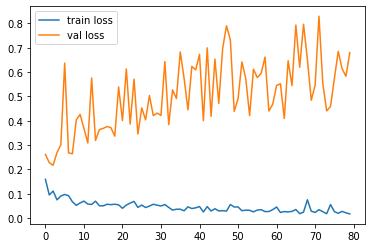

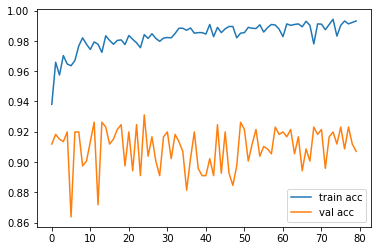

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')